<a href="https://colab.research.google.com/github/gabrielalastra/exam/blob/main/medical_examination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset/medical_examination.csv'

In [6]:
df = pd.read_csv(path)

In [7]:
#Add overweight column
#To determine if a person is overweight, first calculate their BMI by dividing 
#their weight in kilograms by the square of their height in meters. 
#If that value is > 25 then the person is overweight. 
#Use the value 0 for NOT overweight and the value 1 for overweight.

df['overweight'] = (df['weight']/((df['height']/100)**2)).apply(lambda x:1 if x>25 else 0)

In [8]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [13]:
# Normalize data by making 0 always good and 1 always bad. 
#If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
#If the value is more than 1, make the value 1

df['cholesterol'] = df['cholesterol'].apply(lambda x:0 if x==1 else 1)
df['gluc'] = df['gluc'].apply(lambda x:0 if x==1 else 1)

In [14]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,0,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,0,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,0,0,0,0,0,0


In [37]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 
#'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars=['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke','alco', 'active', 'overweight'])

In [38]:
df_cat.tail()

,cardio,variable,value
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1
419999,0,overweight,0


In [39]:
df_cat['total'] = 1

In [40]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()

In [35]:
df_cat.head()

,cardio,variable,value,total
0,0,active,0,1
1,0,active,1,1
2,0,alco,0,1
3,0,alco,1,1
4,0,cholesterol,0,1


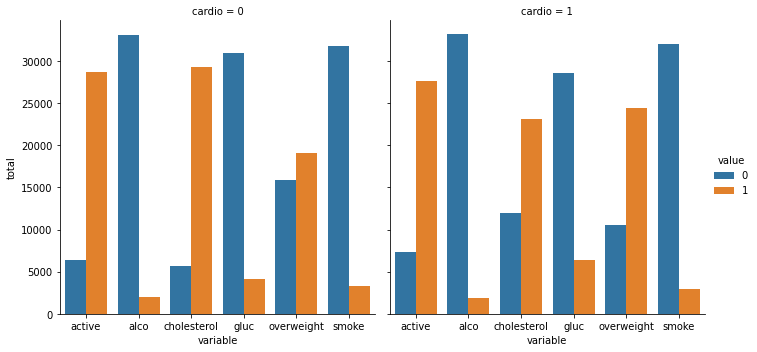

In [42]:
sns.catplot(data=df_cat, x='variable', y='total', hue='value', kind='bar', col='cardio')